<a href="https://colab.research.google.com/github/Binzbo/Bintang/blob/master/FUZZY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=02234b618f789e20aa0a81cb69354628c74af5a4a64fa593cd634d3556fca0c6
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Tingkat pengereman: 49.999999999999986


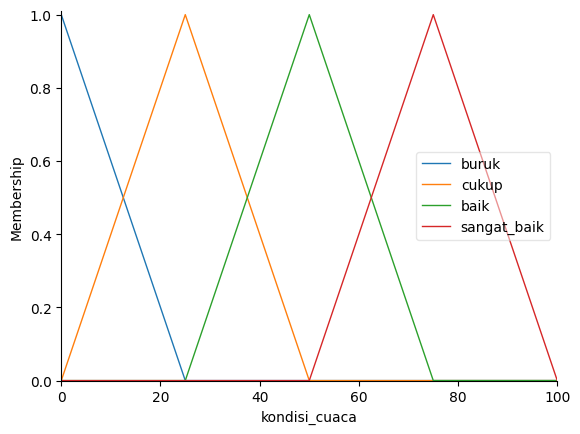

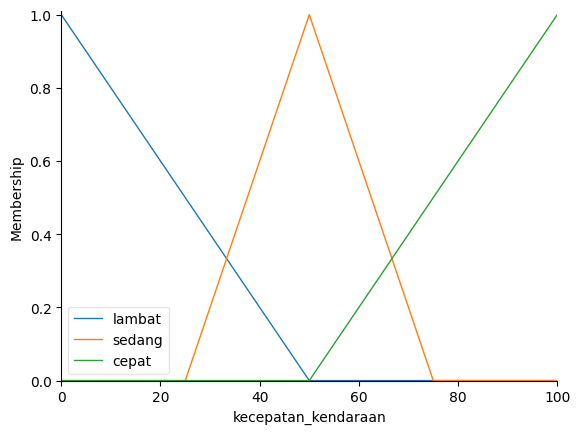

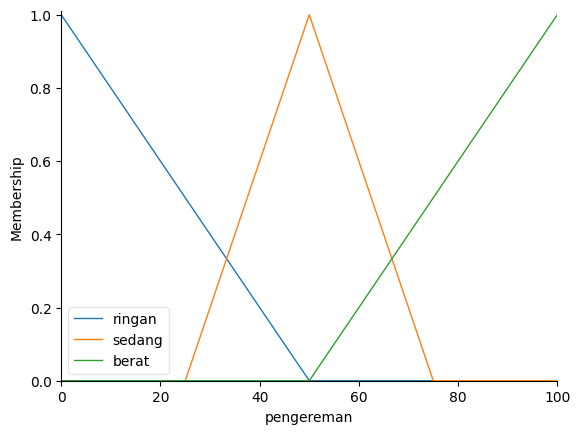

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

from skfuzzy import control as ctrl

# Membuat variabel fuzzy
kondisi_cuaca = ctrl.Antecedent(np.arange(0, 101, 1), 'kondisi_cuaca')
kecepatan_kendaraan = ctrl.Antecedent(np.arange(0, 101, 1), 'kecepatan_kendaraan')
pengereman = ctrl.Consequent(np.arange(0, 101, 1), 'pengereman')

# Mendefinisikan fungsi keanggotaan untuk kondisi_cuaca
kondisi_cuaca['buruk'] = fuzz.trimf(kondisi_cuaca.universe, [0, 0, 25])
kondisi_cuaca['cukup'] = fuzz.trimf(kondisi_cuaca.universe, [0, 25, 50])
kondisi_cuaca['baik'] = fuzz.trimf(kondisi_cuaca.universe, [25, 50, 75])
kondisi_cuaca['sangat_baik'] = fuzz.trimf(kondisi_cuaca.universe, [50, 75, 100])

# Mendefinisikan fungsi keanggotaan untuk kecepatan_kendaraan
kecepatan_kendaraan['lambat'] = fuzz.trimf(kecepatan_kendaraan.universe, [0, 0, 50])
kecepatan_kendaraan['sedang'] = fuzz.trimf(kecepatan_kendaraan.universe, [25, 50, 75])
kecepatan_kendaraan['cepat'] = fuzz.trimf(kecepatan_kendaraan.universe, [50, 100, 100])

# Mendefinisikan fungsi keanggotaan untuk pengereman
pengereman['ringan'] = fuzz.trimf(pengereman.universe, [0, 0, 50])
pengereman['sedang'] = fuzz.trimf(pengereman.universe, [25, 50, 75])
pengereman['berat'] = fuzz.trimf(pengereman.universe, [50, 100, 100])

# Membuat aturan fuzzy
rule1 = ctrl.Rule(kondisi_cuaca['buruk'] & kecepatan_kendaraan['lambat'], pengereman['sedang'])
rule2 = ctrl.Rule(kondisi_cuaca['baik'] | kecepatan_kendaraan['cepat'], pengereman['ringan'])
rule3 = ctrl.Rule(kondisi_cuaca['cukup'] & kecepatan_kendaraan['lambat'], pengereman['berat'])  # Aturan tambahan
rule4 = ctrl.Rule(kondisi_cuaca['sangat_baik'] | kecepatan_kendaraan['cepat'], pengereman['sedang'])  # Aturan tambahan

# Membuat dan menjalankan sistem kontrol
sistem_kontrol = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
simulasi = ctrl.ControlSystemSimulation(sistem_kontrol)

# Memasukkan nilai untuk kedua kondisi dan melakukan komputasi
simulasi.input['kondisi_cuaca'] = 80
simulasi.input['kecepatan_kendaraan'] = 45
simulasi.compute()

# Menampilkan fungsi keanggotaan input
kondisi_cuaca.view()
kecepatan_kendaraan.view()

# Menampilkan fungsi keanggotaan output
pengereman.view()

print("Tingkat pengereman:", simulasi.output['pengereman'])

plt.show()
